In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("C:\\Users\\user\\Desktop\\train_titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass'>

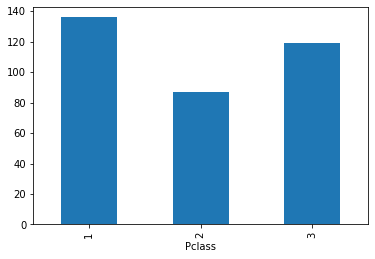

In [4]:
titanic.groupby('Pclass').Survived.sum().plot(kind='bar')

<AxesSubplot:ylabel='Sex,Pclass'>

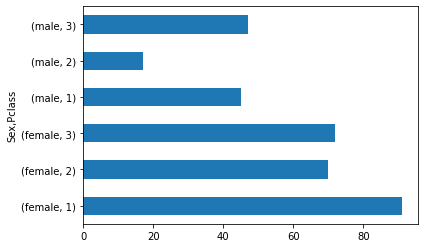

In [5]:
titanic.groupby(['Sex','Pclass']).Survived.sum().plot(kind='barh')

<AxesSubplot:xlabel='Pclass,Sex'>

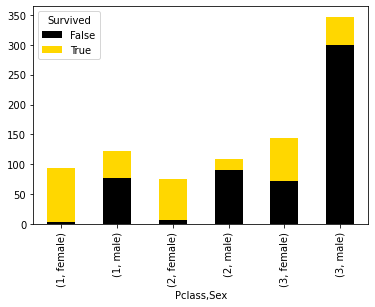

In [7]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

<AxesSubplot:ylabel='Pclass,Sex'>

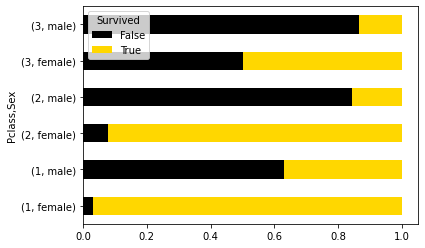

In [8]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

<AxesSubplot:>

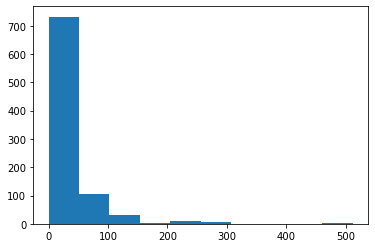

In [10]:
titanic.Fare.hist(grid=False)

<AxesSubplot:>

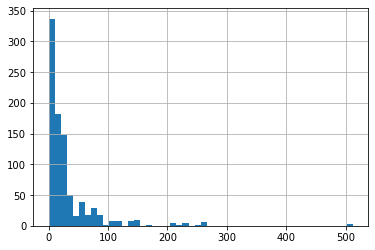

In [11]:
titanic.Fare.hist(bins=50)

In [18]:
import math
sturges = lambda n: int(math.log2(n) + 1)
square_root = lambda n: int(math.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + math.log(len(data)) + math.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.Fare.dropna())

(10, 29, 13)

<AxesSubplot:>

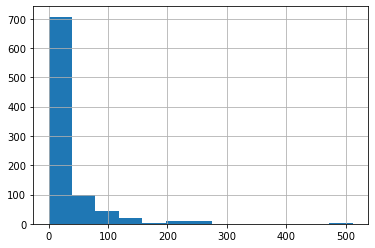

In [19]:
titanic.Fare.hist(bins=doanes(titanic.Fare.dropna()))

<AxesSubplot:ylabel='Density'>

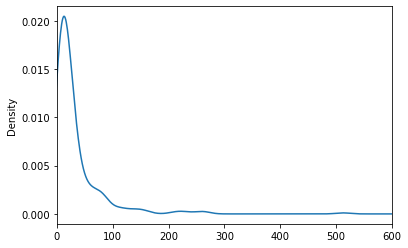

In [20]:
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600))

<AxesSubplot:ylabel='Density'>

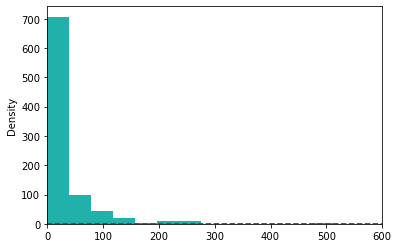

In [22]:
titanic.Fare.hist(bins=doanes(titanic.Fare.dropna()), color='lightseagreen')
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

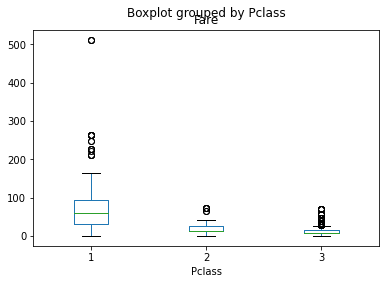

In [23]:
titanic.boxplot(column='Fare', by='Pclass', grid=False)

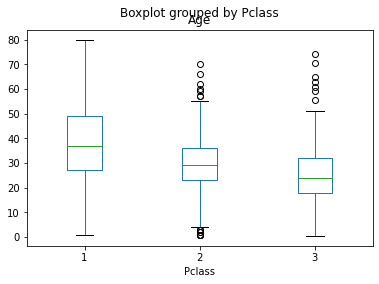

In [28]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False)
for i in [1,2,3]:
    y = titanic.Age[titanic.Pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))

<AxesSubplot:xlabel='Pclass'>

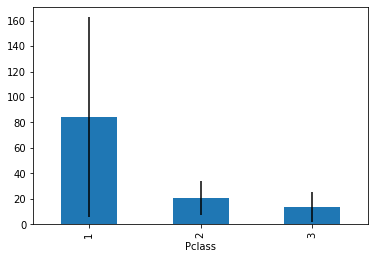

In [29]:
titanic.groupby('Pclass')['Fare'].mean().plot(kind='bar', yerr=titanic.groupby('Pclass')['Fare'].std())

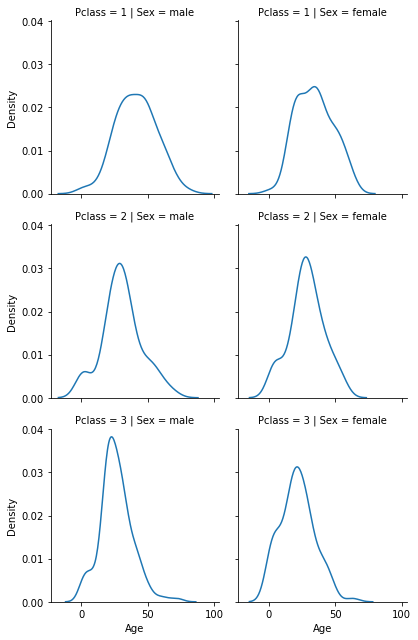

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = titanic[titanic.Age.notnull() & titanic.Fare.notnull()]

g = sns.FacetGrid(titanic, col='Sex', row='Pclass', height=3)
g.map(sns.kdeplot, 'Age')
g.set_axis_labels('Age', 'Density')
plt.show()